            Product_id  Selling_Price
0     SCHE4YSTDVPVZVXW    3503.095117
1     ACCEGCATKHNRXUHW    2265.264353
2     NKCE6GJ5XVJDXNNZ   11183.661570
3     NKCEB8BK3ZXDHDHM    9120.729465
4     TOPEFDXSAHRNPF94    5610.193478
...                ...            ...
3425  BBAE9K7BXFUTDNBK    4036.620876
3426  RTRDYPA4PJHCJCGF    8765.164454
3427  TUNE8FWQBS7TVVT7    5682.329043
3428  NKCEGMUABCRGUZPE    3739.729008
3429  RNGE7M92KAQWUBCS    2218.062254

[3430 rows x 2 columns]


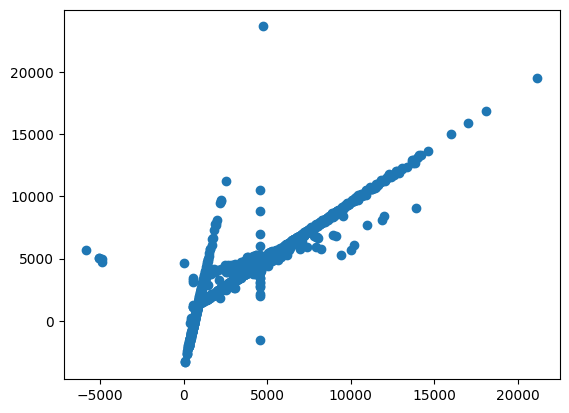

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# causes matplotlib visualizations to embed themselves directly in our jupyter notebook
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

def convertXDf(input):
  x = input[[ 'Stall_no',  'Market_Category',  'Grade', 'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price' ]]

  # ct = ColumnTransformer([("OneHot", OneHotEncoder(), [0])], remainder = "passthrough")
  # x = ct.fit_transform(x)

  Product_Category = input['Product_Category']
  dfpc = stringArrayToIntDf(Product_Category, 'Product_Category')

  x = pd.concat([x,dfpc], axis=1)
  # removing Nan values
  x = removeNaNValues(x)
  return x
def convertYDf(input):
  input = input[['Selling_Price']]
  result = removeNaNValues(input)
  return result
def stringArrayToIntDf(input, name):
   le = preprocessing.LabelEncoder()
   le.fit(input)
   input = le.transform(input)
   dfInput = pd.DataFrame(input)
   dfInput.columns = [name]
   return dfInput
def removeNaNValues(input):
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(input)
    result = imp.transform(input)
    return result

traindf =  pd.read_csv('AssignmentTrain.csv')
x = convertXDf(traindf)
y = convertYDf(traindf)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
plt.scatter(y_test ,  predictions)

testdf = pd.read_csv("AssignmentTest.csv")
x_t = convertXDf(testdf)

predictions_testset = model.predict(x_t)
dfpid = testdf['Product_id']
dfpredtst = pd.DataFrame(predictions_testset)
dfpredtst.columns = ['Selling_Price']
dfpredection = pd.concat([dfpid,dfpredtst], axis=1)

print(dfpredection)
file_name =  'AssignmentSolution.csv'
dfpredection.to_csv(file_name)

